# Import

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from datetime import datetime as dt, timedelta
from pandas_profiling import ProfileReport
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Dataset Overview

In [8]:
def overview_dataset(dataset):
    
    df_overview_after = pd.DataFrame(index=dataset.columns)
    df_overview_after['NaValues'] = dataset.isna().any()
    df_overview_after['dtypes'] = dataset.dtypes
    df_overview_after['UniqueValues'] = dataset.nunique()
    df_overview_after['RecordNumber'] = dataset.count()
    df_overview_after['Median'] = dataset.median()
    df_overview_after['Mean'] = dataset.mean()
    df_overview_after['Standard Deviation'] = dataset.std()
    df_overview_after['25%'] = dataset.quantile(0.25, numeric_only=True)
    df_overview_after['75%'] = dataset.quantile(0.75, numeric_only=True)
    df_overview_after['Min'] = dataset.min(axis=0)
    df_overview_after['Max'] = dataset.max(axis=0)
    

    return df_overview_after

In [10]:
#Read the file and create dataset
filepath = 'income_evaluation.csv'
dataset = pd.read_csv(filepath, encoding='ISO_8859-1')

#trim whitespace from al columns
df_obj = dataset.select_dtypes(['object'])
dataset[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
pre_dataset = overview_dataset(dataset)
pre_dataset

,NaValues,dtypes,UniqueValues,RecordNumber,Median,Mean,Standard Deviation,25%,75%,Min,Max
age,False,int64,73,32561,37.0,38.581647,13.640433,28.0,48.0,17,90
workclass,False,object,9,32561,NaN,NaN,NaN,NaN,NaN,?,Without-pay
fnlwgt,False,int64,21648,32561,178356.0,189778.366512,105549.977697,117827.0,237051.0,12285,1484705
education,False,object,16,32561,NaN,NaN,NaN,NaN,NaN,10th,Some-college
education-num,False,int64,16,32561,10.0,10.080679,2.572720,9.0,12.0,1,16
marital-status,False,object,7,32561,NaN,NaN,NaN,NaN,NaN,Divorced,Widowed
occupation,False,object,15,32561,NaN,NaN,NaN,NaN,NaN,?,Transport-moving
relationship,False,object,6,32561,NaN,NaN,NaN,NaN,NaN,Husband,Wife
race,False,object,5,32561,NaN,NaN,NaN,NaN,NaN,Amer-Indian-Eskimo,White
sex,False,object,2,32561,NaN,NaN,NaN,NaN,NaN,Female,Male


# Pandas Profiling

In [7]:
profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile.to_widgets()

# Data Vizualisation

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
1,2410.0,28.565145,12.239689,2.0,20.0,30.0,40.0,99.0
2,8162.0,39.570938,11.361519,1.0,38.0,40.0,40.0,99.0
3,8546.0,43.272525,10.892905,2.0,40.0,40.0,50.0,99.0
4,6983.0,43.382787,10.856647,1.0,40.0,40.0,49.0,99.0
5,4128.0,42.363857,11.029110,1.0,40.0,40.0,46.0,99.0
6,1792.0,35.061942,15.284207,1.0,24.0,40.0,40.0,99.0
7,441.0,26.031746,16.110524,1.0,13.0,24.0,40.0,99.0
8,99.0,29.555556,18.301457,1.0,15.0,30.0,40.0,99.0


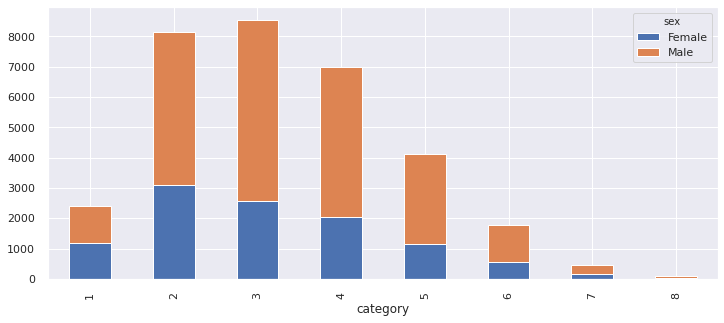

In [11]:
#One-hot encoding sex column
dataframe = dataset.copy()

one_hot = pd.get_dummies(dataframe['sex'])
dataframe = pd.concat([dataframe, one_hot], axis=1)

bins = np.arange(1, 10) * 10
dataframe['category'] = np.digitize(dataframe.age, bins, right=True)

counts = dataframe.groupby(['category', 'sex']).age.count().unstack()
# plt.figure(figsize=(12,5))
counts.plot(kind='bar', stacked=True,figsize=(12, 5))
dataframe.groupby('category')['hours-per-week'].describe()


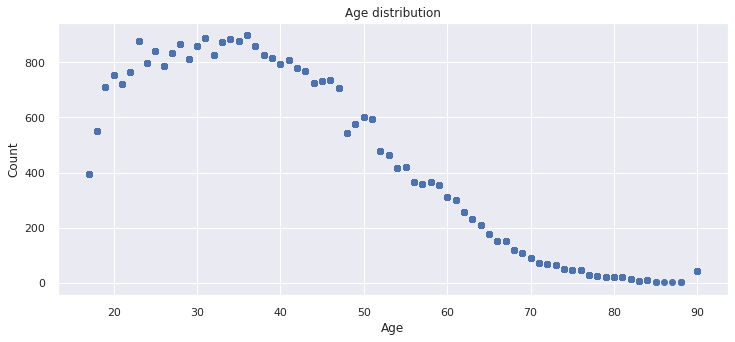

Text(0.5, 1.0, 'Income distributed for different ages')

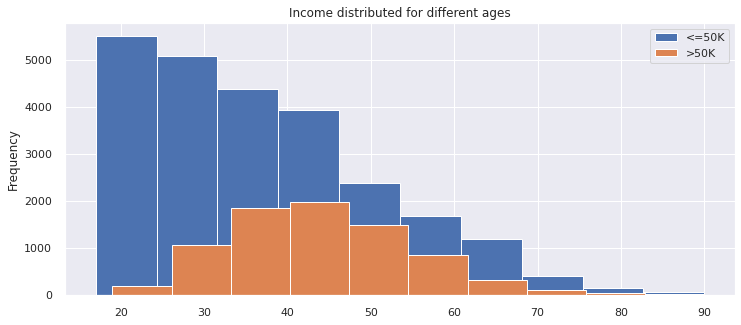

In [18]:
#Age Distribution
age_dt = dataset
age_dt['count'] = dataset.groupby(['age'], as_index=True)['age'].transform('count')


plt.figure(figsize=(12,5))
# plt.scatter(age_dt['age'], age_dt['count'], s=age_dt['count'], alpha=0.5)
plt.scatter(age_dt['age'], age_dt['count'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_dt.groupby('income').age.plot(kind='hist', legend='income', figsize=(12,5))
plt.title('Income distributed for different ages')

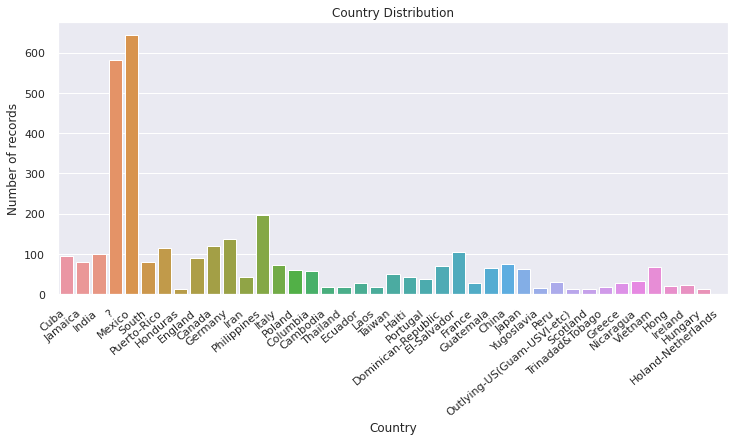

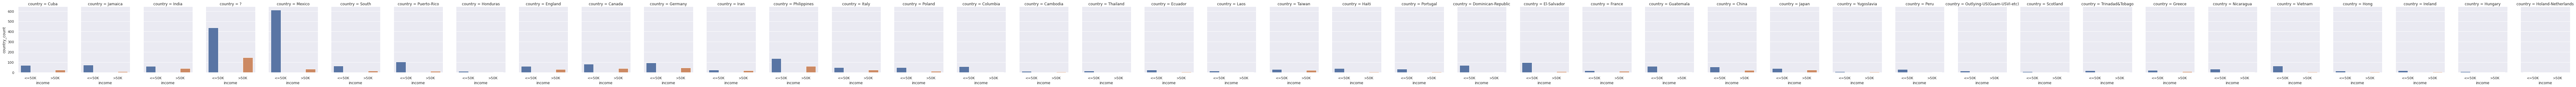

In [13]:
#Country Distribution

country_df = dataset.copy()
country_df = country_df.rename(columns={'native-country':'country'})
country_df['country_count'] = country_df.groupby(['country','income'], as_index=True)['country'].transform('count')
country_df['country'] = country_df['country'].loc[country_df[country_df['country']!='United-States'].index]
plt.figure(figsize=(12,5))
sns.countplot(x=country_df['country'])
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Number of records')

# country_df.groupby('income').country.plot(kind='hist', legend='income')
# plt.title('Income distributed for different countries')

ax = sns.catplot(x="income", y="country_count",
                hue="income", col="country",
                data=country_df, kind="bar",
                height=4, aspect=.7);

In [ ]:
#Education Distribution

education_df = dataset.copy()
education_df['education_count'] = education_df.groupby(['education','income'], as_index=True)['education'].transform('count')

plt.figure(figsize=(12,5))
sns.countplot(x=education_df['education'])
plt.xticks(rotation=40,ha='right')
plt.title("Education Distribution")
plt.xlabel('Education')
plt.ylabel('Number of records')

ax = sns.catplot(x="income", y="education_count",
                hue="income", col="education",
                data=education_df, kind="bar",
                height=4, aspect=.7);

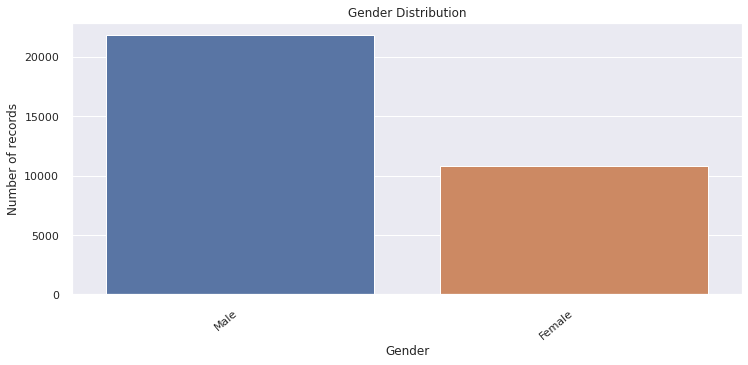

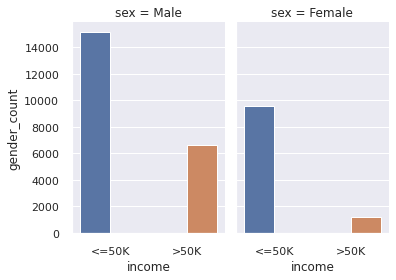

In [14]:
#Gender Distribution

gender_df = dataset.copy()
gender_df['gender_count'] = gender_df.groupby(['sex','income'], as_index=True)['sex'].transform('count')

plt.figure(figsize=(12,5))
sns.countplot(x=gender_df['sex'])
plt.xticks(rotation=40,ha='right')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Number of records')

ax = sns.catplot(x="income", y="gender_count",
                hue="income", col="sex",
                data=gender_df, kind="bar",
                height=4, aspect=.7);

In [ ]:
#Occupation, Marital Status, Workclass, Race Distribution

occupation_df = dataset.copy()
occupation_df['occupation_count'] = occupation_df.groupby(['occupation','income'], as_index=True)['occupation'].transform('count')
occupation_df['race_count'] = occupation_df.groupby(['race','income'], as_index=True)['race'].transform('count')
occupation_df = occupation_df.rename(columns={"marital-status":"status"})
occupation_df['martial_count'] = occupation_df.groupby(['status','income'], as_index=True)['status'].transform('count')
occupation_df['workclass_count'] = occupation_df.groupby(['workclass','income'], as_index=True)['workclass'].transform('count')

ax = sns.catplot(x="income", y="occupation_count",
                hue="income", col="occupation",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="race_count",
                hue="income", col="race",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="martial_count",
                hue="income", col="status",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="workclass_count",
                hue="income", col="workclass",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

In [ ]:
sns.pairplot(dataset, hue="income")
sns.pairplot(dataset)
plt.figure(figsize=(12,5))
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
#Hour-age-income

df = dataset.copy()
df['count_hours'] = df.groupby(['hours-per-week'], as_index=True)['hours-per-week'].transform('count')

plt.figure(figsize=(8,5))
plt.scatter(df['hours-per-week'], df['count_hours'])
plt.title('hours-per-week distribution')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.show()

#Hour-age
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sns.lineplot(ax=ax, x="age", y="hours-per-week",data=df)
# df.loc[(df['age']<30) & (df['hours-per-week']>50)]

# fig, ax = plt.subplots(figsize=(12.7, 8.27))
# p1 = sns.relplot(ax=ax, x="age", y="hours-per-week", hue="income", data=dataset);
# plt.close(p1.fig)
dataframe.groupby('category')['hours-per-week'].describe()

In [ ]:
capitalgain_df = dataset.copy()
capitalgain_df.drop(capitalgain_df.loc[capitalgain_df['capital-gain'] == 0].index,inplace=True)
print(capitalgain_df.shape)
plt.figure(figsize=(12,5))
ax = sns.distplot(capitalgain_df['capital-gain'], kde=True);

dataset.groupby('income')['capital-gain'].mean()

In [ ]:
capitalloss_df = dataset.copy()
capitalloss_df.drop(capitalloss_df.loc[capitalloss_df['capital-loss'] == 0].index,inplace=True)
print(capitalloss_df.shape)
plt.figure(figsize=(12,5))
ax = sns.distplot(capitalloss_df['capital-loss'], kde=True);